# Questo è il file principale dove verranno effettuate delle analisi complete su tutti i dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
# Add count values on top of each bar
def add_count_on_bars(ax):
    # Add count values on top of each bar
    for p in ax.patches:
     ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

##### dataset dei generi dei film

In [6]:
genres_df = pd.read_csv("Main_data/genres.csv")
ids_movies = genres_df['id'].unique()

# visualizziamo i genere per gruppo di id
grouped_genres_df = genres_df.groupby('id')["genre"].agg(list).reset_index()

# selezioniamo i film che hanno il genere Comedy
grouped_genres_df[grouped_genres_df["genre"].apply(lambda x: "Comedy" in x)].reset_index(drop = True)
grouped_genres_df

print(len(ids_movies))


676491


##### dataset dei paesi di produzione

In [7]:
countries_df = pd.read_csv("Main_data/countries.csv")
grouped_countries_df = countries_df.groupby('id')["country"].agg(list).reset_index()
grouped_countries_df


,id,country
0,1000001,"[UK, USA]"
1,1000002,[South Korea]
2,1000003,[USA]
3,1000004,"[Germany, USA]"
4,1000005,"[Hong Kong, USA]"
...,...,...
617187,1941593,[China]
617188,1941594,[USA]
617189,1941595,[USA]
617190,1941596,[China]


### eseguiamo delle analisi su un dataset composto per analizzare le correlazioni tra generi dei film

In [8]:
# uniamo i film con i loro generi
movies_df_norm = pd.read_csv("File_normalizzati/movies_normalized.csv")
movies_w_genres_df = pd.merge(movies_df_norm, grouped_genres_df, on = "id")
movies_w_genres_df

,id,name,date,description,minute,rating,genre
0,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,"[Comedy, Adventure]"
1,1000002,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,"[Comedy, Thriller, Drama]"
2,1000003,Everything Everywhere All at Once,2022.0,An aging Chinese immigrant is swept up in an i...,140.0,4.30,"[Science Fiction, Adventure, Comedy, Action]"
3,1000004,Fight Club,1999.0,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,[Drama]
4,1000005,La La Land,2016.0,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,"[Drama, Comedy, Music, Romance]"
...,...,...,...,...,...,...,...
676486,1941559,你谁啊,NaN,NaN,67.0,NaN,[Comedy]
676487,1941563,数到三,NaN,NaN,NaN,NaN,[Drama]
676488,1941566,日本統一35,NaN,The leaders of the Kyowakai are surprised that...,80.0,NaN,[Crime]
676489,1941569,日本統一38,NaN,"Obuchi, the young leader of Gasonkai, a group ...",70.0,NaN,[Crime]


In [9]:
# eseguiamo una breve analisi esplorativa sul numero di film per genere ad esempio le commedie
movies_w_genres_df[movies_w_genres_df["genre"].apply(lambda x: "Comedy" in x)].reset_index(drop = True)
tot_comedy = movies_w_genres_df["genre"].apply(lambda x: "Comedy" in x).sum()
print(f"Totale delle commedie: {tot_comedy}")

Totale delle commedie: 140636


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Documentary'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Animation'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Romance'),
  Text(6, 0, 'Thriller'),
  Text(7, 0, 'Music'),
  Text(8, 0, 'Action'),
  Text(9, 0, 'Crime'),
  Text(10, 0, 'Family'),
  Text(11, 0, 'TV Movie'),
  Text(12, 0, 'Adventure'),
  Text(13, 0, 'Fantasy'),
  Text(14, 0, 'Mystery'),
  Text(15, 0, 'Science Fiction'),
  Text(16, 0, 'History'),
  Text(17, 0, 'War'),
  Text(18, 0, 'Western')])

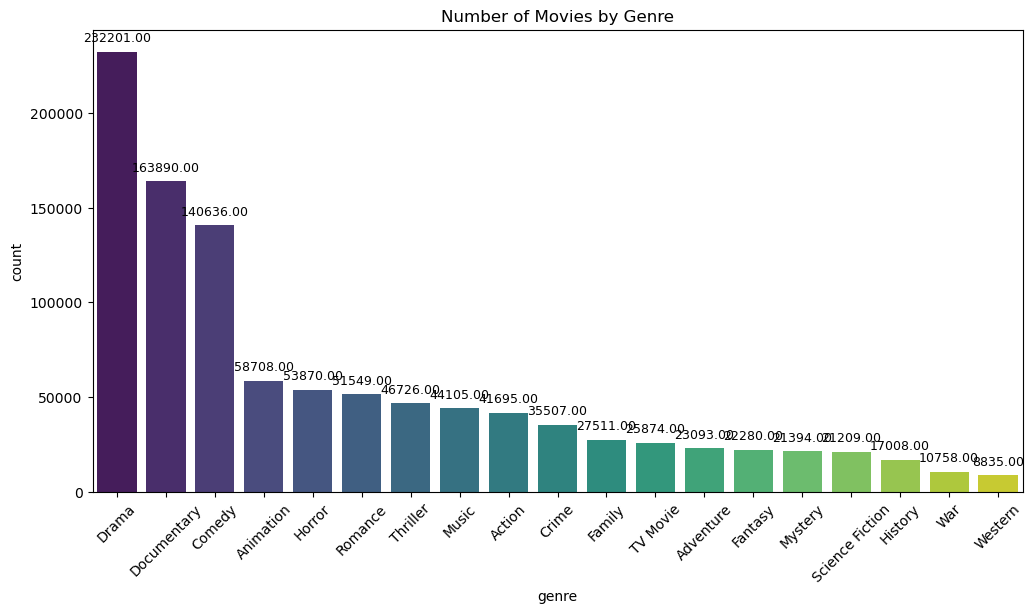

In [ ]:
# mostriamo in un grafico il numero di film per genere
plt.figure(figsize=(12,6))
ax = sns.countplot(data = movies_w_genres_df.explode("genre"), x = "genre", order = movies_w_genres_df.explode("genre")["genre"].value_counts().index, palette="viridis")
plt.title("Numero dei film per genere")
add_count_on_bars(ax)
plt.xticks(rotation = 45)


Il genre più apprezzato è Documentary con una valutazione media di 3.52


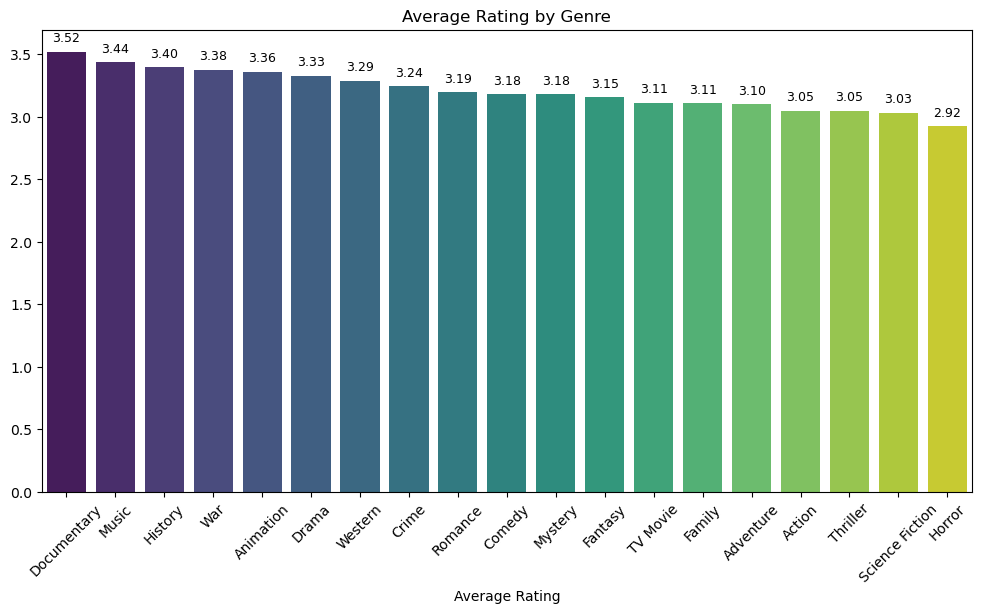

In [ ]:
# mostriamo un grafico con il genere più apprezzato facendo una media dei rating
exploded_genres_df = movies_w_genres_df.explode("genre")
genre_ratings_df = exploded_genres_df.groupby("genre")["rating"].mean().sort_values(ascending = False)

plt.figure(figsize= (12, 6))
ax = sns.barplot(y = genre_ratings_df.values, x = genre_ratings_df.index, palette = "viridis", order= genre_ratings_df.index)
plt.title("Rating medio per genere")
plt.xlabel("Rating medio")
plt.xticks(rotation = 45)

add_count_on_bars(ax)

most_appreciated_genre = genre_ratings_df.index[0]
average_rating_most_appreciated = genre_ratings_df.iloc[0]
print(f"\nIl genre più apprezzato è {most_appreciated_genre} con una valutazione media di {average_rating_most_appreciated:.2f}")

#### eseguiamo un'analisi sui genere per vedere qual è il più apprezzato in determinati range di periodo

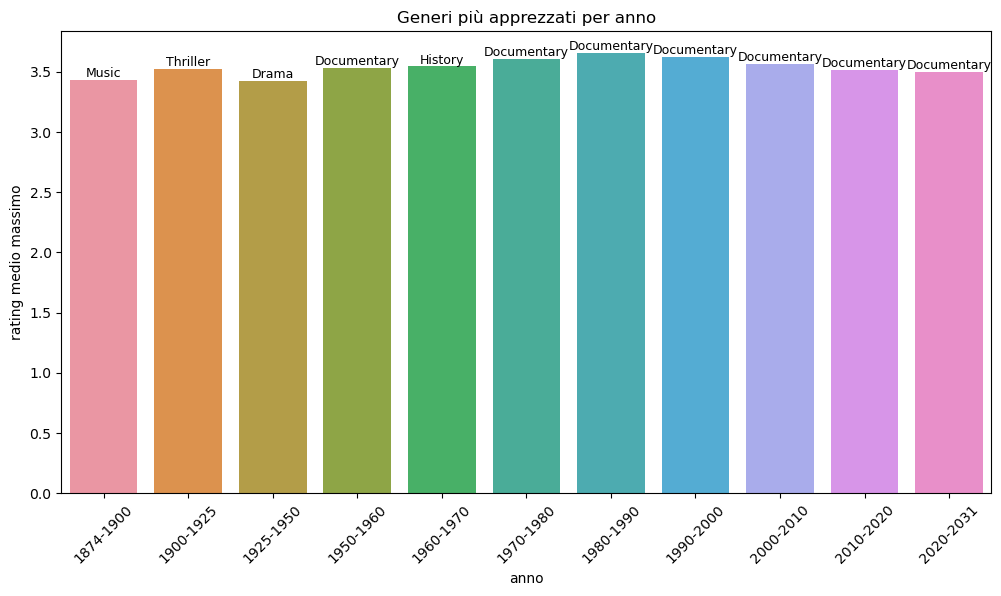

In [70]:
# creazione di un range di anni per analizzare i film in base al loro anno di uscita
year_range = [movies_w_genres_df["date"].min(), 1900, 1925, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, float("inf")]
labels = ["1874-1900", "1900-1925", "1925-1950", "1950-1960", "1960-1970", "1970-1980", "1980-1990", "1990-2000", "2000-2010", "2010-2020", "2020-2031"]

# nuova colonna per il range di anni
movies_w_genres_df["year_range"] = pd.cut(movies_w_genres_df["date"], bins = year_range, labels = labels, right = False)

# divisione dei generi dei film
explode_genre = movies_w_genres_df.explode("genre").copy()

# calcolo della media dei rating per ogni genere e range di anni
avg_rating_per_genre_range = explode_genre.groupby(["year_range", "genre"], observed = True)["rating"].mean().reset_index()

# indice per ottenere il rating massimo per selezionare il record corretto
idx = avg_rating_per_genre_range.groupby("year_range", observed=True)["rating"].idxmax()
top_genre_per_year = avg_rating_per_genre_range.loc[idx]

plt.figure(figsize = (12,6))
ax = sns.barplot(data = top_genre_per_year, x = "year_range", y = "rating")

# blcocco di codice per stampare il genere sopra le barre  ------ NOTE: questo blocco di codice è stato realizzato in parte grazie all'aiuto dell'AI
for i, bar in enumerate(ax.patches):
    # Prendi la riga di dati corrispondente alla barra i-esima
    try:
        row_data = top_genre_per_year.iloc[i]
        genre_label = row_data['genre'] # Prendi il genere da quella riga

        ax.text(
            bar.get_x() + bar.get_width() / 2., # Posizione X (centro della barra)
            bar.get_height(),                   # Posizione Y (cima della barra)
            genre_label,                        # Testo da mostrare (il genere)
            ha='center',                        # Allineamento orizzontale
            va='bottom',                        # Allineamento verticale
            rotation=0,                         # Ruota leggermente
            fontsize=9                          # Dimensione font
        )
    except IndexError:
        print(f"Warning: Mismatch between number of bars ({len(ax.patches)}) and data rows ({len(top_genre_per_year)}) at index {i}. Skipping annotation.")


plt.title("Generi più apprezzati per anno")
plt.xlabel("anno")
plt.ylabel("rating medio massimo")
plt.xticks(rotation = 45)
plt.show()
    
    

##### quali sono i generi che hanno durata maggiore in media

### Analisi su un dataset composto per analizzare le correlazioni dei film per paese di produzione

In [13]:
movies_w_country = pd.merge(movies_df_norm, grouped_countries_df, on = "id")
movies_w_country

,id,name,date,description,minute,rating,country
0,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,"[UK, USA]"
1,1000002,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,[South Korea]
2,1000003,Everything Everywhere All at Once,2022.0,An aging Chinese immigrant is swept up in an i...,140.0,4.30,[USA]
3,1000004,Fight Club,1999.0,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,"[Germany, USA]"
4,1000005,La La Land,2016.0,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,"[Hong Kong, USA]"
...,...,...,...,...,...,...,...
617187,1941593,神笛,NaN,NaN,NaN,NaN,[China]
617188,1941594,蟲極道蜜団子抗争編 壱ノ巻,NaN,Shinjuku forest at night. In the sap taverns o...,30.0,NaN,[USA]
617189,1941595,蟲極道蜜団子抗争編 弐ノ巻,NaN,"The city that never sleeps, where insects gath...",30.0,NaN,[USA]
617190,1941596,重生,NaN,"In a world where order has broken down, darkne...",NaN,NaN,[China]
